<a href="https://colab.research.google.com/github/Qan123/Machine-Learning/blob/main/Handling_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('outliers.csv')
df

,x1,x2,y
0,11.0,0.140452,11.0
1,19.0,0.473867,15.0
2,31.0,1.713352,20.0
3,16.0,0.888953,13.0
4,36.0,0.118194,23.0
...,...,...,...
9995,30.0,1.705223,20.0
9996,28.0,2.444101,19.0
9997,37.0,1.089873,24.0
9998,36.0,0.776210,23.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10000 non-null  float64
 1   x2      10000 non-null  float64
 2   y       10000 non-null  float64
dtypes: float64(3)
memory usage: 234.5 KB


In [31]:
df.describe()

,x1,x2,y
count,10000.0000,10000.000000,10000.000000
mean,29.9199,0.795030,19.959300
std,10.0421,0.599598,5.034697
min,-6.0000,-0.127513,2.000000
25%,23.0000,0.318087,17.000000
50%,30.0000,0.688281,20.000000
75%,37.0000,1.137827,23.000000
max,66.0000,3.748642,38.000000


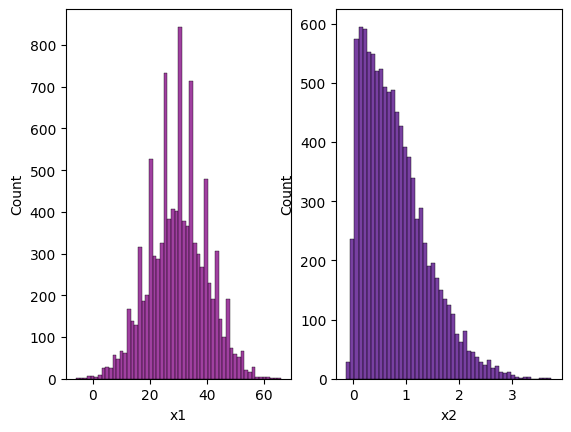

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols =2)
sns.histplot(x = df.x1, data = df, ax = ax1, color = 'purple')
sns.histplot(x = df.x2, data = df, ax = ax2, color = '#4b0082')
plt.show()

Mean of x1: 29.9199
Std of x1: 10.04209979868935
Min -6.0
Max 66.0


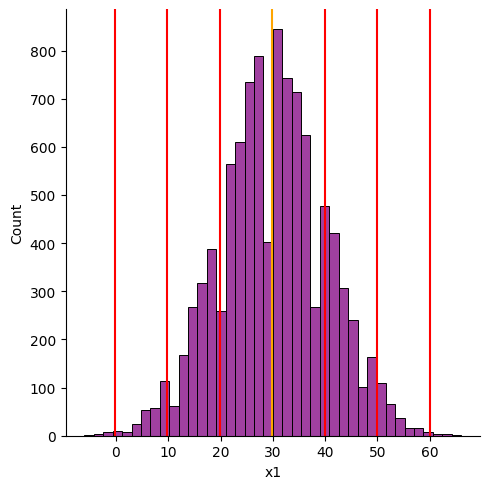

In [51]:
mu = df.x1.mean()
sigma = df.x1.std()
min = df.x1.min()
max = df['x1'].max()
print("Mean of x1:", mu)
print("Std of x1:", sigma)
print("Min", min)
print("Max", max)
sns.displot(x = df.x1, data = df, kind='hist', bins = 40, color = 'purple')
plt.axvline(mu, color = 'orange')

for i in [-3,-2, -1, 1, 2, 3]:
  plt.axvline(mu + i*sigma, color = 'red')
plt.show()

option 1: limit the boundary

In [34]:
upper_limit = mu + 3 * sigma
lower_limit = mu - 3 * sigma

df[(df.x1>upper_limit) | (df.x1<lower_limit)]

,x1,x2,y
765,-1.0,0.158337,5.0
825,-1.0,1.095189,5.0
1138,-2.0,0.044623,4.0
1322,63.0,1.351085,36.0
2195,64.0,1.069022,37.0
2411,63.0,0.032994,36.0
3493,-1.0,-0.001617,5.0
5544,62.0,1.907387,36.0
6171,61.0,0.694187,35.0
6639,-4.0,2.498395,3.0


option 2: by z-score

In [35]:
df1 = df.copy()
df1['x1_z'] = (df1.x1 - df.x1.mean()) / df1.x1.std()
df1

,x1,x2,y,x1_z
0,11.0,0.140452,11.0,-1.884058
1,19.0,0.473867,15.0,-1.087412
2,31.0,1.713352,20.0,0.107557
3,16.0,0.888953,13.0,-1.386154
4,36.0,0.118194,23.0,0.605461
...,...,...,...,...
9995,30.0,1.705223,20.0,0.007976
9996,28.0,2.444101,19.0,-0.191185
9997,37.0,1.089873,24.0,0.705042
9998,36.0,0.776210,23.0,0.605461


In [36]:
df1[(df1.x1_z > 3) | (df1.x1_z < -3)]

,x1,x2,y,x1_z
765,-1.0,0.158337,5.0,-3.079027
825,-1.0,1.095189,5.0,-3.079027
1138,-2.0,0.044623,4.0,-3.178608
1322,63.0,1.351085,36.0,3.294142
2195,64.0,1.069022,37.0,3.393722
2411,63.0,0.032994,36.0,3.294142
3493,-1.0,-0.001617,5.0,-3.079027
5544,62.0,1.907387,36.0,3.194561
6171,61.0,0.694187,35.0,3.094980
6639,-4.0,2.498395,3.0,-3.377770


removing outline by trimmimg

In [37]:
df_new = df[(df.x1 <= upper_limit) & (df.x1 >= lower_limit)]
df_new

,x1,x2,y
0,11.0,0.140452,11.0
1,19.0,0.473867,15.0
2,31.0,1.713352,20.0
3,16.0,0.888953,13.0
4,36.0,0.118194,23.0
...,...,...,...
9995,30.0,1.705223,20.0
9996,28.0,2.444101,19.0
9997,37.0,1.089873,24.0
9998,36.0,0.776210,23.0


removing outliers using z-score

In [38]:
df1_new = df1[(df1.x1_z <= 3) & (df1.x1_z >= -3)]
df1_new

,x1,x2,y,x1_z
0,11.0,0.140452,11.0,-1.884058
1,19.0,0.473867,15.0,-1.087412
2,31.0,1.713352,20.0,0.107557
3,16.0,0.888953,13.0,-1.386154
4,36.0,0.118194,23.0,0.605461
...,...,...,...,...
9995,30.0,1.705223,20.0,0.007976
9996,28.0,2.444101,19.0,-0.191185
9997,37.0,1.089873,24.0,0.705042
9998,36.0,0.776210,23.0,0.605461


In [39]:
df1_new = df1_new.drop('x1_z' , axis =1)
df1_new

,x1,x2,y
0,11.0,0.140452,11.0
1,19.0,0.473867,15.0
2,31.0,1.713352,20.0
3,16.0,0.888953,13.0
4,36.0,0.118194,23.0
...,...,...,...
9995,30.0,1.705223,20.0
9996,28.0,2.444101,19.0
9997,37.0,1.089873,24.0
9998,36.0,0.776210,23.0


capped 

In [40]:
capped_df = df.copy()
capped_df['x1'] = np.where(df.x1 > upper_limit, upper_limit, np.where(df.x1 < lower_limit, lower_limit, df.x1))
capped_df

,x1,x2,y
0,11.0,0.140452,11.0
1,19.0,0.473867,15.0
2,31.0,1.713352,20.0
3,16.0,0.888953,13.0
4,36.0,0.118194,23.0
...,...,...,...
9995,30.0,1.705223,20.0
9996,28.0,2.444101,19.0
9997,37.0,1.089873,24.0
9998,36.0,0.776210,23.0


In [41]:
capped_df.describe()

,x1,x2,y
count,10000.000000,10000.000000,10000.000000
mean,29.920305,0.795030,19.959300
std,10.028301,0.599598,5.034697
min,-0.206399,-0.127513,2.000000
25%,23.000000,0.318087,17.000000
50%,30.000000,0.688281,20.000000
75%,37.000000,1.137827,23.000000
max,60.046199,3.748642,38.000000


IQR method for removing outliers

<Axes: xlabel='x2'>

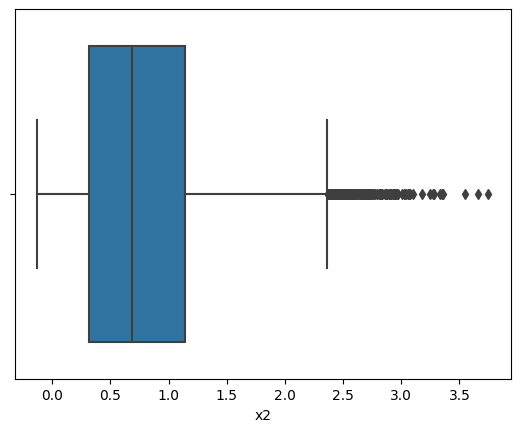

In [42]:
sns.boxplot(x = df.x2, data=df)

calculate IQR

In [43]:
q1 = df.x2.quantile(0.25)
q3 = df.x2.quantile(0.75)
iqr = q3 - q1

q1, q3, iqr

(0.3180869457514564, 1.1378268461687178, 0.8197399004172614)

calculating lower and upper limits

In [44]:
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

lower_limit, upper_limit

(-0.9115229048744358, 2.36743669679461)

In [45]:
df[(df.x2>upper_limit) | (df.x2<lower_limit)]

,x1,x2,y
11,32.0,2.674464,21.0
35,25.0,2.856379,18.0
80,36.0,2.579868,23.0
147,18.0,2.976488,14.0
148,39.0,2.547117,24.0
...,...,...,...
9716,36.0,2.548617,23.0
9784,32.0,2.467331,21.0
9836,47.0,2.735268,29.0
9982,41.0,2.579395,26.0


removing these outliers by trimming

In [46]:
df_new = df[(df.x2 <= upper_limit) & (df.x2 >= lower_limit)]
df_new

,x1,x2,y
0,11.0,0.140452,11.0
1,19.0,0.473867,15.0
2,31.0,1.713352,20.0
3,16.0,0.888953,13.0
4,36.0,0.118194,23.0
...,...,...,...
9994,28.0,0.292074,19.0
9995,30.0,1.705223,20.0
9997,37.0,1.089873,24.0
9998,36.0,0.776210,23.0


<Axes: xlabel='x2'>

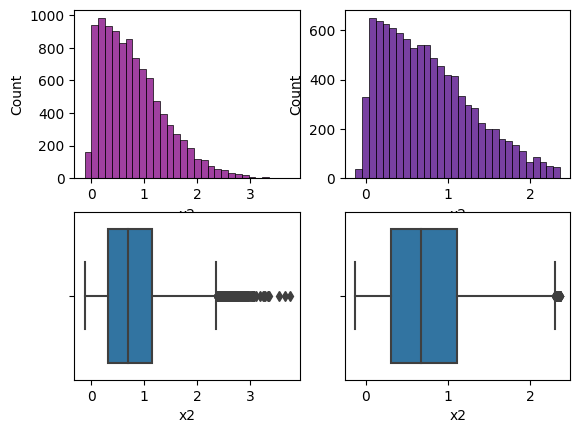

In [47]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
sns.histplot(x = 'x2', data=df, ax = ax1, bins =30, color='purple')
sns.histplot(x = 'x2', data=df_new, ax = ax2, bins =30, color='#4b0082')
sns.boxplot(x =  'x2', data=df, ax = ax3)
sns.boxplot(x = 'x2', data=df_new, ax = ax4)

replacing by capping

In [48]:
capped_df = df.copy()
capped_df['x2'] = np.where(df.x2 > upper_limit, upper_limit, np.where(df.x2 < lower_limit, lower_limit, df.x2))
capped_df

,x1,x2,y
0,11.0,0.140452,11.0
1,19.0,0.473867,15.0
2,31.0,1.713352,20.0
3,16.0,0.888953,13.0
4,36.0,0.118194,23.0
...,...,...,...
9995,30.0,1.705223,20.0
9996,28.0,2.367437,19.0
9997,37.0,1.089873,24.0
9998,36.0,0.776210,23.0


<Axes: xlabel='x2'>

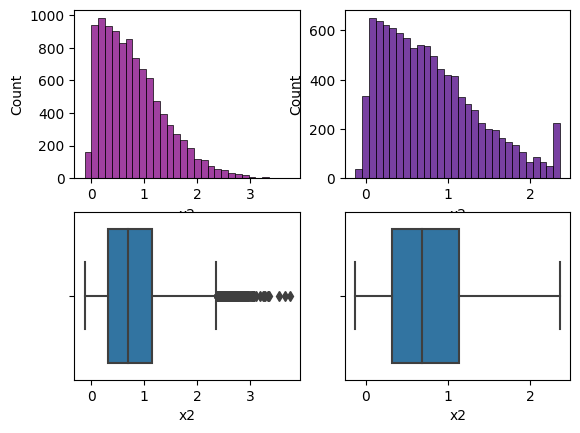

In [49]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
sns.histplot(x = 'x2', data=df, ax = ax1, bins =30, color='purple')
sns.histplot(x = 'x2', data=capped_df, ax = ax2, bins =30, color='#4b0082')
sns.boxplot(x =  'x2', data=df, ax = ax3)
sns.boxplot(x = 'x2', data=capped_df, ax = ax4)

Percentile method to identify outliers

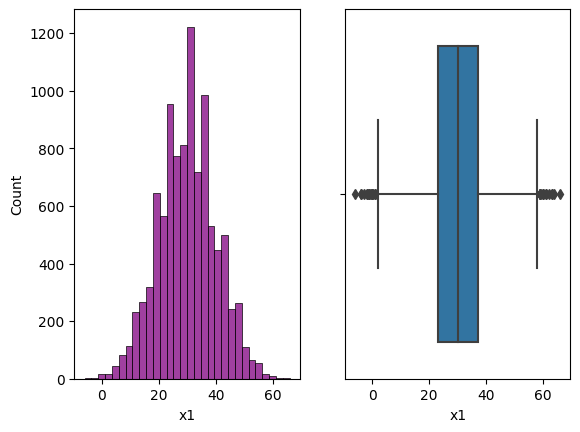

In [53]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
sns.histplot(x='x1', data = df, bins=30, color='purple', ax=ax1)
sns.boxplot(x=df['x1'], ax=ax2)
plt.show();

In [54]:
lower_limit = df['x1'].quantile(0.01)
upper_limit = df['x1'].quantile(0.99)
lower_limit, upper_limit

(6.0, 53.0)

In [56]:
df_new = df[(df.x1 >= lower_limit) & (df.x1 <= upper_limit)]
df_new.shape

(9835, 3)

<Axes: xlabel='x1'>

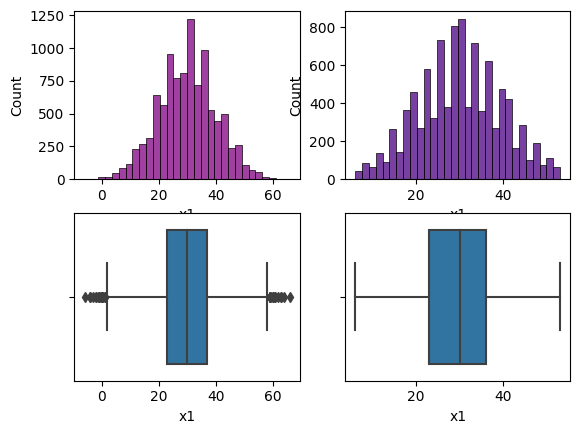

In [57]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
sns.histplot(x = 'x1', data=df, ax = ax1, bins =30, color='purple')
sns.histplot(x = 'x1', data=df_new, ax = ax2, bins =30, color='#4b0082')
sns.boxplot(x =  'x1', data=df, ax = ax3)
sns.boxplot(x = 'x1', data=df_new, ax = ax4)

## Multivariate 

In [58]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df_house = pd.read_csv('Ames_Housing_Data.csv')
df_house

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [60]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [64]:
df_house.corr(numeric_only=True)

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
PID,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,-0.098375,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,-0.060075,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,0.215583,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,0.191555,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,0.284118,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,-0.050935,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,0.279870,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,0.151790,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,0.301872,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285
BsmtFin SF 1,-0.098375,-0.060075,0.215583,0.191555,0.284118,-0.050935,0.279870,0.151790,0.301872,1.000000,...,0.224010,0.124947,-0.100455,0.050541,0.095874,0.084140,0.092886,-0.001155,0.022397,0.432914


In [63]:
df_house.corr(numeric_only=True)['SalePrice']

PID               -0.246521
MS SubClass       -0.085092
Lot Frontage       0.357318
Lot Area           0.266549
Overall Qual       0.799262
Overall Cond      -0.101697
Year Built         0.558426
Year Remod/Add     0.532974
Mas Vnr Area       0.508285
BsmtFin SF 1       0.432914
BsmtFin SF 2       0.005891
Bsmt Unf SF        0.182855
Total Bsmt SF      0.632280
1st Flr SF         0.621676
2nd Flr SF         0.269373
Low Qual Fin SF   -0.037660
Gr Liv Area        0.706780
Bsmt Full Bath     0.276050
Bsmt Half Bath    -0.035835
Full Bath          0.545604
Half Bath          0.285056
Bedroom AbvGr      0.143913
Kitchen AbvGr     -0.119814
TotRms AbvGrd      0.495474
Fireplaces         0.474558
Garage Yr Blt      0.526965
Garage Cars        0.647877
Garage Area        0.640401
Wood Deck SF       0.327143
Open Porch SF      0.312951
Enclosed Porch    -0.128787
3Ssn Porch         0.032225
Screen Porch       0.112151
Pool Area          0.068403
Misc Val          -0.015691
Mo Sold            0

In [66]:
df_house.corr(numeric_only=True)['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

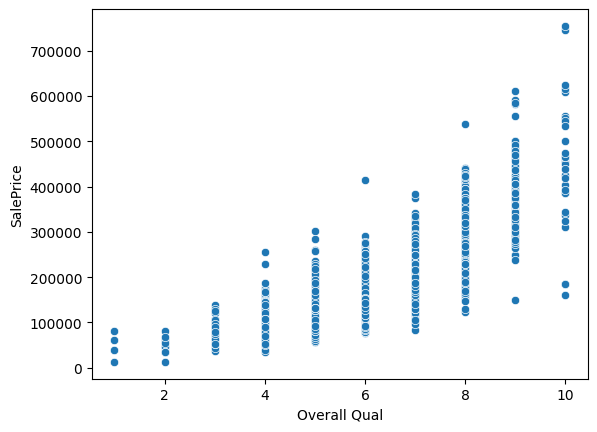

In [67]:
sns.scatterplot(x='Overall Qual', y='SalePrice', data=df_house);

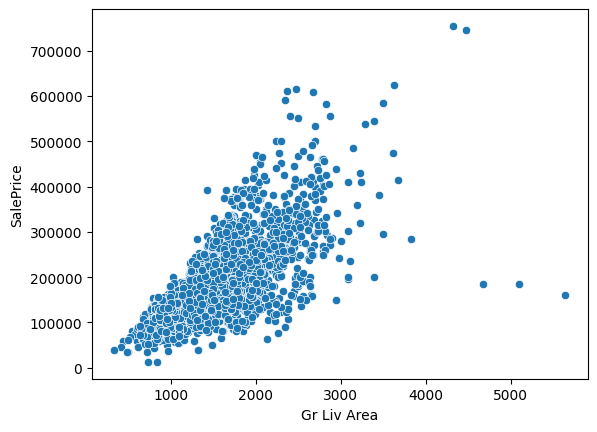

In [68]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df_house);

In [69]:
df_house[(df_house['Gr Liv Area']>4000) & (df_house['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [70]:
indices = df_house[(df_house['Gr Liv Area']>4000) & (df_house['SalePrice']<200000)].index
indices

Int64Index([1498, 2180, 2181], dtype='int64')

In [71]:
new_df_house = df_house.drop(indices,axis=0)
new_df_house.shape

(2927, 81)